In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

Using TensorFlow backend.


для развлечений:
[dreamer.py](https://github.com/samim23/DeepDreamAnim)

Реализация GAN'а ниже взята [отсюда](https://github.com/eriklindernoren/Keras-GAN)<br />
Ее вывод будет сохраняться в папку images. <br \> 

In [0]:
!mkdir results

In [42]:
!ls

images	results


In [0]:
!mkdir images

In [0]:
path = '../images/'--quiet

In [14]:
!wget -t 2 -P $path -i http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n07753592

--2019-06-13 16:02:25--  http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n07753592
Resolving www.image-net.org (www.image-net.org)... 171.64.68.16
Connecting to www.image-net.org (www.image-net.org)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘../images/imagenet.synset.geturls?wnid=n07753592’

imagenet.synset.get     [   <=>              ]  84.79K   119KB/s    in 0.7s    

2019-06-13 16:02:27 (119 KB/s) - ‘../images/imagenet.synset.geturls?wnid=n07753592’ saved [86825]

--2019-06-13 16:02:27--  http://farm1.static.flickr.com/166/331118839_c6fcbeeadb.jpg
Resolving farm1.static.flickr.com (farm1.static.flickr.com)... 13.35.250.20, 2600:9000:200c:f600:0:5a51:64c9:c681, 2600:9000:200c:8200:0:5a51:64c9:c681, ...
Connecting to farm1.static.flickr.com (farm1.static.flickr.com)|13.35.250.20|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm1.static.fl

In [15]:
!ls

 100112639_90fda47766.jpg    2527878297_1c24a2c950.jpg
 1003499219_c321147242.jpg   2532704246_92cbcb2867.jpg
 100412966_9a63f65c23.jpg    2534349438_28d9a7f0d5.jpg
 100456789_04d13f8e76.jpg    253864806_34e75212cc.jpg
 1004628903_fc21a10cc7.jpg   2540211101_2ee9b45601.jpg
 1005851110_a1a9533414.jpg   2546048314_4476cd9feb.jpg
 100688507_79517b8740.jpg    2547893249_9707951fe2.jpg
 100809056_7d95315297.jpg    2552970062_be4ef1f7c5.jpg
 101206060_8002bb0c2d.jpg    2553014759_d21c7aaf63.jpg
 101746634_3239fc12e2.jpg    2553634667_b4326db64e.jpg
 1020368545_06aee19113.jpg   2554456796_7535dc83f3.jpg
 1021278863_8cd18291ac.jpg   2554697173_ebecb24504.jpg
 10250940_14b2bbc4cf.jpg     2563294135_7c544b50dc.jpg
 10260099_5da5e1b035.jpg     256490774_820c56c729.jpg
 102700727_94257507c9.jpg    2565604134_1e9bdb531a.jpg
 102734365_33dcaa5cc7.jpg    2565635653_1491c26176.jpg
 103250262_e07fa0736a.jpg    2567235149_8435a5b8f0.jpg
 103414857_b347a7320b.jpg    2567969976_4c30ffe6dc.jpg
 104543109_6

In [0]:
import os, os.path
os.remove(PATH+'394601718_25dd03727d.jpg')

In [0]:
import torch
import torchvision
from PIL import Image
PATH = 'images/'
IMG_SIZE = 28
img_list = os.listdir(PATH)
IMG_PATH = PATH
def batch_generator(img_list, batch_size):
    batch_list = np.random.choice(img_list, batch_size)
    img_batch = np.empty((batch_size, IMG_SIZE, IMG_SIZE, 3))

    for i, im in enumerate(batch_list):
        img = Image.open(IMG_PATH + im)
        img = img.convert('RGB')
        img = np.array(img.resize((IMG_SIZE, IMG_SIZE)), dtype='float32')
        img_batch[i, :] = img

    #img_batch = np.array(img_batch) / 255.
    return img_batch

In [50]:
len(img_list)

1065

In [51]:
batch_generator(img_list,1066)

array([[[[148.,  68., 157.],
         [ 94.,  71., 179.],
         [ 30.,  26.,  23.],
         ...,
         [103.,  86., 200.],
         [131.,  85., 183.],
         [138.,  88., 175.]],

        [[180., 174., 210.],
         [ 29.,  21.,  60.],
         [ 30.,  24.,  26.],
         ...,
         [158., 158., 210.],
         [160., 156., 206.],
         [173., 172., 214.]],

        [[134., 119., 162.],
         [ 28.,  17.,  51.],
         [ 25.,  18.,  26.],
         ...,
         [136., 134., 183.],
         [136., 136., 186.],
         [137., 134., 179.]],

        ...,

        [[ 46.,  28.,  54.],
         [ 37.,  21.,  57.],
         [214., 201., 192.],
         ...,
         [ 96., 100.,  39.],
         [154., 148.,  74.],
         [107., 109.,  60.]],

        [[168., 125., 119.],
         [112.,  83.,  87.],
         [ 92.,  64.,  61.],
         ...,
         [169., 175.,  75.],
         [180., 198.,  88.],
         [158., 168.,  81.]],

        [[129.,  65.,  79.],
       

In [0]:
class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 3
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)


    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        X_train = batch_generator(img_list,1060)

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        #X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                # Plot the progress
                print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt])
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig('../results/'+"%d.png" % epoch)
        plt.close()

In [53]:
gan = GAN()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               1204736   
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 1,336,321
Trainable params: 1,336,321
Non-trainable params: 0
_________________________________________________________________


In [54]:
gan.train(30000)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.730321, acc.: 46.88%] [G loss: 0.635867]
50 [D loss: 0.281467, acc.: 89.84%] [G loss: 2.271623]
100 [D loss: 0.587644, acc.: 72.27%] [G loss: 1.614954]
150 [D loss: 0.627806, acc.: 60.16%] [G loss: 1.232379]
200 [D loss: 0.675084, acc.: 58.20%] [G loss: 1.097137]
250 [D loss: 0.652773, acc.: 61.33%] [G loss: 1.037821]
300 [D loss: 0.705028, acc.: 55.47%] [G loss: 1.008533]
350 [D loss: 0.666431, acc.: 60.16%] [G loss: 0.960506]
400 [D loss: 0.665387, acc.: 61.72%] [G loss: 0.911067]
450 [D loss: 0.657143, acc.: 65.23%] [G loss: 0.954333]
500 [D loss: 0.659081, acc.: 59.38%] [G loss: 0.924821]
550 [D loss: 0.647060, acc.: 58.98%] [G loss: 0.927603]
600 [D loss: 0.611632, acc.: 70.31%] [G loss: 0.990719]
650 [D loss: 0.609749, acc.: 65.23%] [G loss: 0.987317]
700 [D loss: 0.622622, acc.: 66.41%] [G loss: 0.973223]
750 [D loss: 0.613629, acc.: 67.19%] [G loss: 1.049858]
800 [D loss: 0.580353, acc.: 77.73%] [G loss: 1.067998]
850 [D loss: 0.594440, acc.: 71.09%] [G loss: 1.070

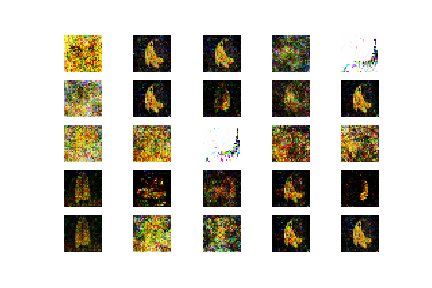

In [62]:
from IPython.display import Image
Image('../results/29950.png',width=500, height=500)